# Vector Data Operations

For this exercise, you will build on what you have learned to load data and then perform some basic calculations.

The following data sets will be used. 

 * United States Polys - https://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_20m.zip More information can be found [here](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2016.html)
 *  New York State Historic Sites and Park Boundary - (Right-Click, Copy Link to new tab for download) https://gis.ny.gov/gisdata/fileserver/?DSID=430&file=oprhp18.zip More information can be found [here](https://gis.ny.gov/gisdata/inventories/details.cfm?DSID=430)
 

## Task: Data Set 1 - United States Polys
 * Download the ZIP file to your `module3/temp/` folder.
 * Unzip the file into the  `module3/temp/States/` folder
 * Load the data into a GeoDataFrame - call the frame 'states'
 * Plot the data

In [8]:
import os
import urllib.request
import shutil
from pathlib import Path
from zipfile import ZipFile

In [9]:
# Add Your Code to Download and unzip the States File
# ---------------------------------------------------

file_URL = 'https://web.dsa.missouri.edu/static/data/geodata/states.zip'

local_file_name = 'states.zip'

file_Path = Path('../temp/')  
file_Path /= local_file_name

with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

to_unzip = ZipFile('../temp/states.zip', 'r')
unzipped = '../temp/States'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file

In [26]:
# Add Your Code to load the data
# ------------------------------
import geopandas as gpd

states = gpd.read_file('../temp/States')

<AxesSubplot:>

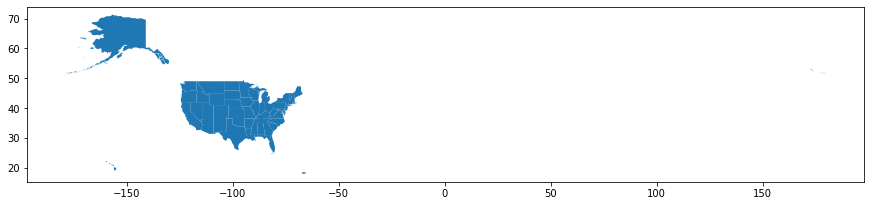

In [27]:
# Add Your Code to plot the data
# ---------------------------------
import matplotlib.pyplot as plt

%matplotlib inline

states.plot(figsize=(15,15))

## Task: Data Set 2 - New York State Histroic Sites and Park Boundary
 * Download the ZIP file to your `module3/temp/` folder.
 * Unzip the file into the `module3/temp/Parks/` folder
 * Load the data into a GeoDataFrame - call the frame 'trails'
 * Plot the data

In [13]:
# Add Your Code to Download the parks and historic sites file
# ------------------------------------------------------------

file_URL = 'https://web.dsa.missouri.edu/static/data/geodata/Parks.zip'

local_file_name = 'Parks.zip'

file_Path = Path('../temp/')  
file_Path /= local_file_name

with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

to_unzip = ZipFile('../temp/Parks.zip', 'r')
unzipped = '../temp/Parks'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file

In [16]:
# Add Your Code to load the data
# ------------------------------
import geopandas as gpd

Parks = gpd.read_file('../temp/Parks')

<AxesSubplot:>

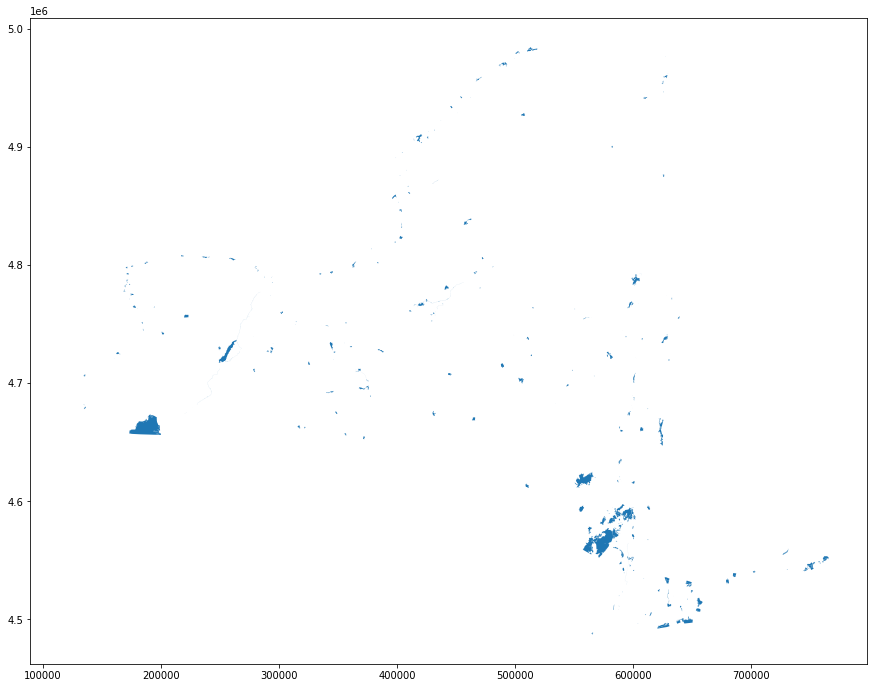

In [17]:
# Add Your Code to plot the data
# ---------------------------------
import matplotlib.pyplot as plt

%matplotlib inline

Parks.plot(figsize=(15,15))

#### Now that the data is loaded, let's do some calculations

## Task: Calculate the area of Hawaii in squared kilometers

In [34]:
# Add Your Code to calculate area 
# -------------------------------
hawaii = states[states.NAME == 'Hawaii']

hawaii = hawaii.to_crs({'init':'epsg:29101'})

projected_area = (hawaii['geometry'].area / (1000000.0)).iloc[0]

print("Area of Hawaii is {0:.0f} square kilometers".format(projected_area))

Area of Hawaii is 39686 square kilometers


/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


## Task: Determine the centroid of each of the locations in the NY Parks dataset.
Hint: Save the centriod to the dataframe or another dataframe as you will be using it again below

<AxesSubplot:>

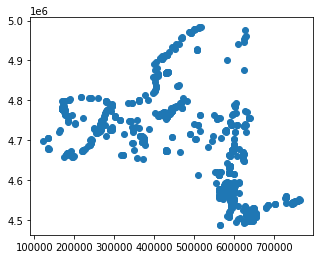

In [52]:
# Add Your Code to calculate the centriods 
# -------------------------------
centriod = gpd.GeoSeries(Parks.centroid)

centriod.plot()

## Task: Create a map that includes the state outline of NY, the centriods and the parks.

In [55]:
Parks.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


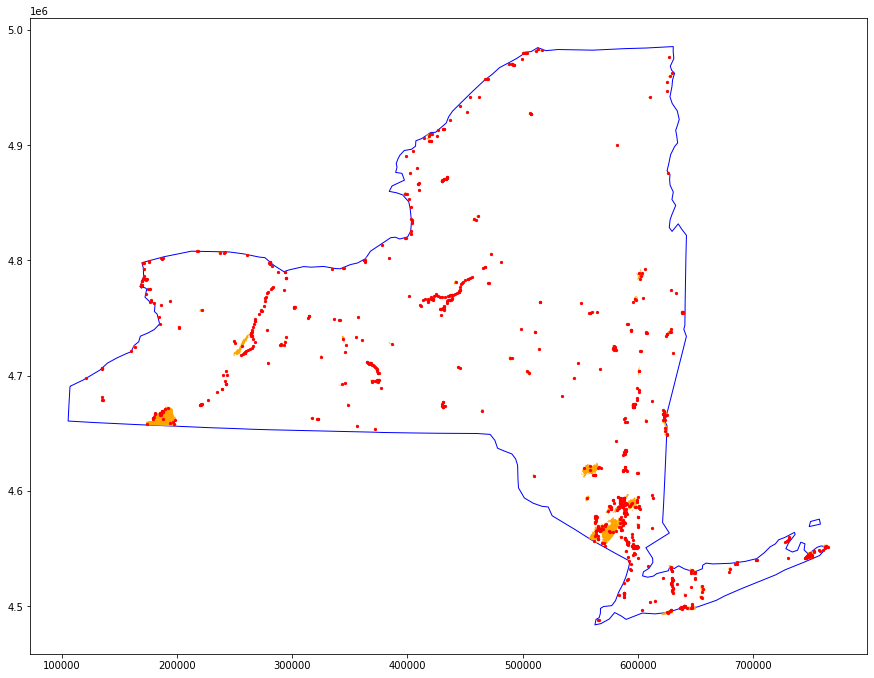

In [59]:
# Add Your Code to create your map
# --------------------------------
ny = states[states.NAME == 'New York']

ny = ny.to_crs({'init':'epsg:26918'})

base = ny.plot(color='white', edgecolor='blue',figsize=(15,15))

Parks.plot(ax=base, marker='o', color='orange', markersize=5)

centriod.plot(ax=base, marker='o', color='red', markersize=5);

## Task: Now add the following cities to the map as well.
- New York City - Latitude and longitude GPS coordinates are: 40.730610, -73.935242
- Albany - Latitude and longitude GPS coordinates are: 42.652580, -73.756233
- Syracuse - Latitude and longitude GPS coordinates are: 43.088947, -76.154480
- Rochester - Latitude and longitude GPS coordinates are: 43.161030, -77.610924
- Buffalo - Latitude and longitude GPS coordinates are: 42.880230, -78.878738
- Watertown - Latitude and longitude GPS coordinates are: 43.974785, -75.910759

In [63]:
# Add Your Code to create the second map 
# --------------------------------------
from shapely.geometry import Point
from geopandas import GeoSeries, GeoDataFrame

data = {'name': ['New York City', 'Albany', 'Syracuse', 'Rochester', 'Buffalo', 'Watertown'],
        'lat': [40.730610, 42.652580, 43.088947, 43.161030, 42.880230, 43.974785],
        'lon': [-73.935242, -73.756233, -76.154480, -77.610924, -78.878738, -75.910759]}

geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]

series = GeoSeries(geometry, index=data['name'])
series

New York City    POINT (-73.93524 40.73061)
Albany           POINT (-73.75623 42.65258)
Syracuse         POINT (-76.15448 43.08895)
Rochester        POINT (-77.61092 43.16103)
Buffalo          POINT (-78.87874 42.88023)
Watertown        POINT (-75.91076 43.97478)
dtype: geometry

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

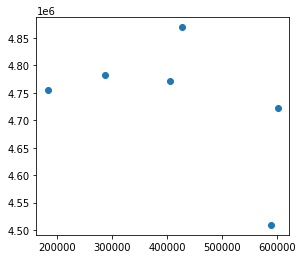

In [68]:
series.crs = "EPSG:4326"
series = series.to_crs({'init':'epsg:26918'})
series.plot()

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


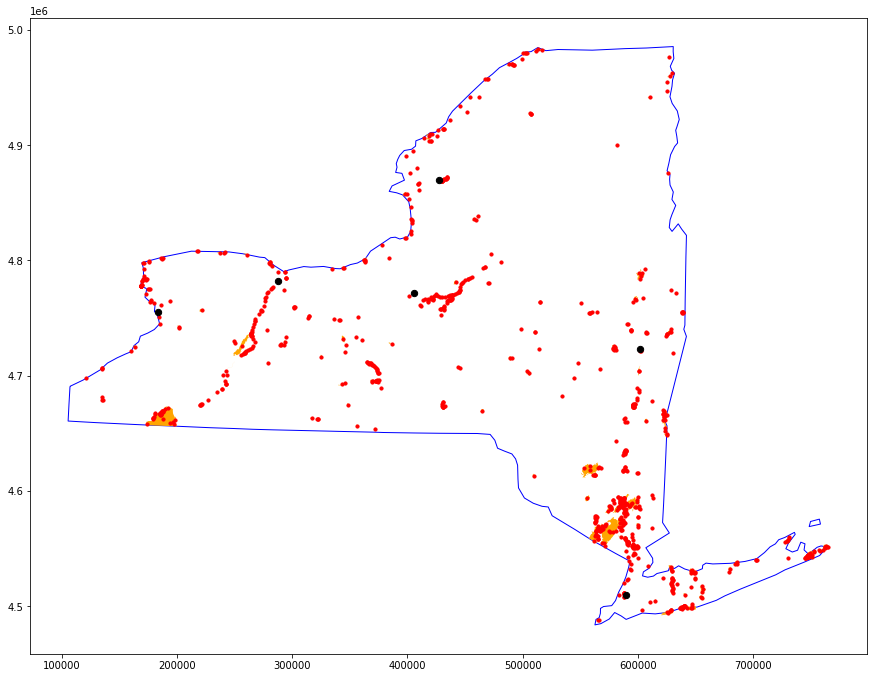

In [77]:
ny = states[states.NAME == 'New York']

ny = ny.to_crs({'init':'epsg:26918'})

base = ny.plot(color='white', edgecolor='blue',figsize=(15,15))

Parks.plot(ax=base, marker='o', color='orange', markersize=5)

centriod.plot(ax=base, marker='o', color='red', markersize=10)

series.plot(ax=base, marker='o', color='black', markersize=40);